In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from sklearn.metrics import classification_report, confusion_matrix
import joblib
from sklearn.impute import SimpleImputer

print("All libraries imported successfully!")

All libraries imported successfully!


In [ ]:
try:
    df = pd.read_csv('creditcard.csv')
    print("Dataset loaded successfully!")
    print("--- First 5 Rows ---")
    print(df.head())
    print("\n--- Dataset Info ---")
    df.info()
    print(f"\n--- Missing Values ---\n{df.isnull().sum().max()} missing values found.")
except FileNotFoundError:
    print("ERROR: 'creditcard.csv' not found. Please upload the file to your Colab session.")

Dataset loaded successfully!
--- First 5 Rows ---
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141

In [ ]:
print("Missing values per column before imputation:")
print(df.isnull().sum())

# imputer object to fill missing values with the median
imputer = SimpleImputer(strategy='median')

# fit the imputer on the data and transform it
# convert numpy array back into dataframe
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# check again for any more missing values
print("\nMissing values per column after imputation:")
print(df_imputed.isnull().sum())

# replace old with new dataframe
df = df_imputed

print("\nMissing values have been handled using median imputation.")

Missing values per column before imputation:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Missing values per column after imputation:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Missing values have been handled using median imputation.



--- Class Distribution ---
Class
0.0    284315
1.0       492
Name: count, dtype: int64
Percentage of Fraudulent Transactions: 0.1727%


/tmp/ipython-input-1171045248.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette=['#3498db', '#e74c3c'])


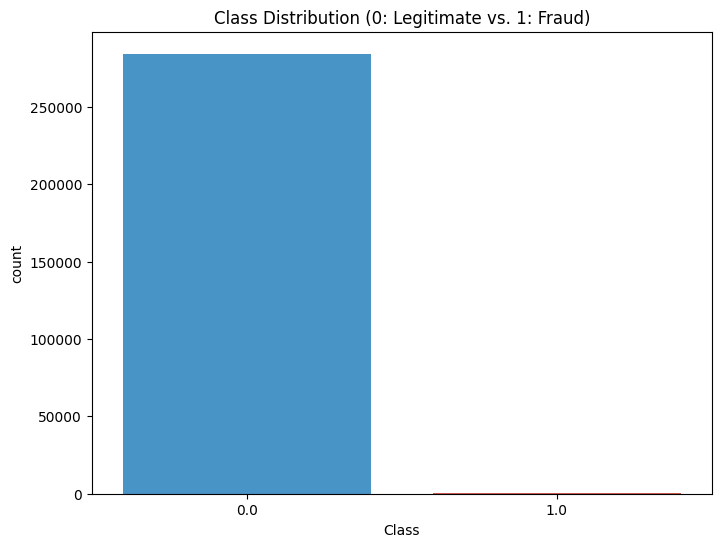

In [ ]:
# --- Class Distribution Analysis ---
print("\n--- Class Distribution ---")
print(df['Class'].value_counts())
fraud_percentage = (df['Class'].value_counts()[1] / len(df)) * 100
print(f"Percentage of Fraudulent Transactions: {fraud_percentage:.4f}%")

# displaying the class imbalance
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df, palette=['#3498db', '#e74c3c'])
plt.title('Class Distribution (0: Legitimate vs. 1: Fraud)')
plt.show()

In [ ]:
# separating the features (x) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Data Splitting Complete.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Data Splitting Complete.
Shape of X_train: (227845, 30)
Shape of X_test: (56962, 30)


In [ ]:
# --- Scaling ---
amount_scaler = StandardScaler()
time_scaler = StandardScaler()

# fit the scaler on the training data's Amount and Time
X_train['Amount'] = amount_scaler.fit_transform(X_train['Amount'].values.reshape(-1, 1))
X_train['Time'] = time_scaler.fit_transform(X_train['Time'].values.reshape(-1, 1))

# use same scalar to transform the test data
X_test['Amount'] = amount_scaler.transform(X_test['Amount'].values.reshape(-1, 1))
X_test['Time'] = time_scaler.transform(X_test['Time'].values.reshape(-1, 1))

print("'Time' and 'Amount' columns have been scaled correctly.")

'Time' and 'Amount' columns have been scaled correctly.


# **DAY 2**

In [ ]:
print("\n--- Applying SMOTE to the training data ---")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("SMOTE applied successfully.")


--- Applying SMOTE to the training data ---
SMOTE applied successfully.


In [ ]:
# --- Model 1: Logistic Regression ---
print("\n--- Training Logistic Regression ---")
log_reg = LogisticRegression(random_state=42, max_iter=200).fit(X_train_resampled, y_train_resampled)
print("Logistic Regression trained.")

# --- Model 2: Random Forest ---
print("\n--- Training Random Forest ---")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1).fit(X_train_resampled, y_train_resampled)
print("Random Forest trained.")

# --- Model 3: Neural Network ---
print("\n--- Training Neural Network ---")
neural_net = Sequential([
    InputLayer(input_shape=(X_train_resampled.shape[1],)),
    Dense(16, activation='relu'), Dense(8, activation='relu'), Dense(1, activation='sigmoid')
])
neural_net.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
neural_net.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=64, verbose=0)
print("Neural Network trained.")


--- Training Logistic Regression ---
Logistic Regression trained.

--- Training Random Forest ---
Random Forest trained.

--- Training Neural Network ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Neural Network trained.


# DAY 3

In [ ]:
# --- make Predictions ---
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_nn = (neural_net.predict(X_test) > 0.5).astype("int32")

# --- display Reports ---
print("\n\n--- Logistic Regression Performance ---")
print(classification_report(y_test, y_pred_log_reg))

print("\n\n--- Random Forest Performance ---")
print(classification_report(y_test, y_pred_rf))

print("\n\n--- Neural Network Performance ---")
print(classification_report(y_test, y_pred_nn))

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


--- Logistic Regression Performance ---
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     56864
         1.0       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



--- Random Forest Performance ---
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.85      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



--- Neural Network Performance ---
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.48      0.84      0.61        98

    accuracy            



--- Logistic Regression Performance ---
Classification Report:
                precision    recall  f1-score   support

Legitimate (0)       1.00      0.97      0.99     56864
     Fraud (1)       0.06      0.92      0.11        98

      accuracy                           0.97     56962
     macro avg       0.53      0.95      0.55     56962
  weighted avg       1.00      0.97      0.99     56962



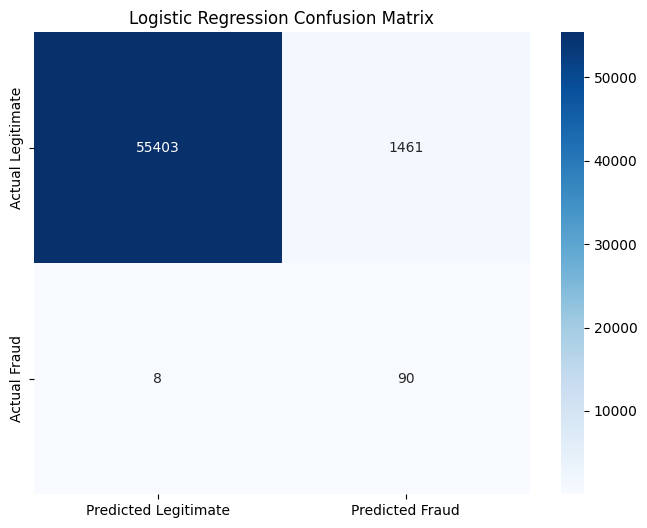



--- Random Forest Performance ---
Classification Report:
                precision    recall  f1-score   support

Legitimate (0)       1.00      1.00      1.00     56864
     Fraud (1)       0.85      0.84      0.84        98

      accuracy                           1.00     56962
     macro avg       0.92      0.92      0.92     56962
  weighted avg       1.00      1.00      1.00     56962



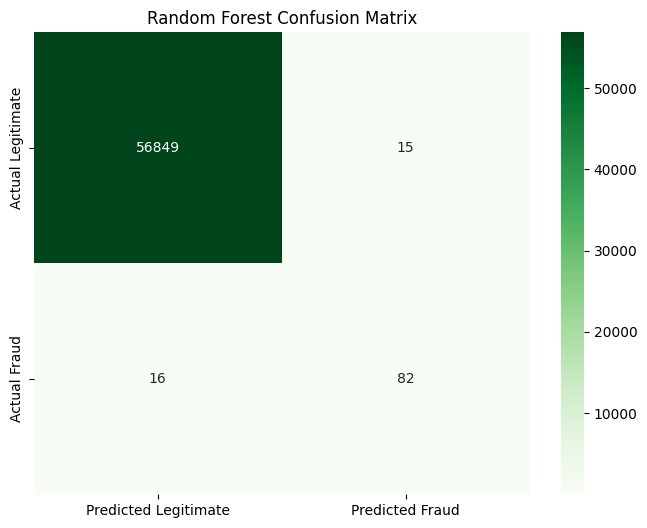



--- Neural Network Performance ---
Classification Report:
                precision    recall  f1-score   support

Legitimate (0)       1.00      1.00      1.00     56864
     Fraud (1)       0.48      0.84      0.61        98

      accuracy                           1.00     56962
     macro avg       0.74      0.92      0.80     56962
  weighted avg       1.00      1.00      1.00     56962



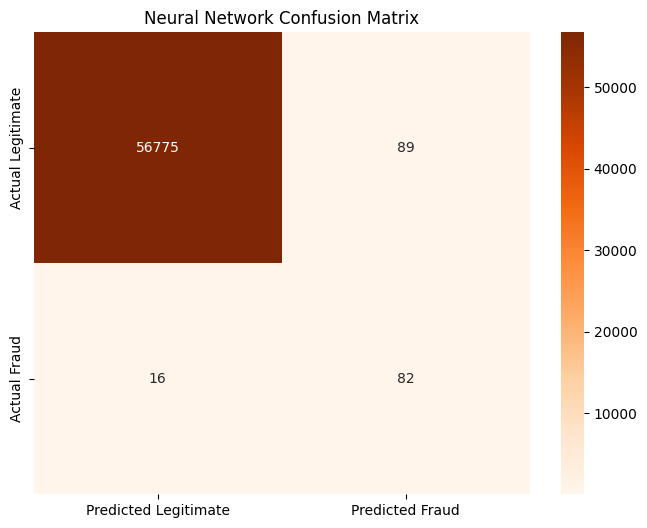

In [ ]:
### Model 1: Logistic Regression Evaluation
print("\n\n--- Logistic Regression Performance ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=['Legitimate (0)', 'Fraud (1)']))

# Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Legitimate', 'Predicted Fraud'],
            yticklabels=['Actual Legitimate', 'Actual Fraud'])
plt.title('Logistic Regression Confusion Matrix')
plt.show()


### Model 2: Random Forest Evaluation
print("\n\n--- Random Forest Performance ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Legitimate (0)', 'Fraud (1)']))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted Legitimate', 'Predicted Fraud'],
            yticklabels=['Actual Legitimate', 'Actual Fraud'])
plt.title('Random Forest Confusion Matrix')
plt.show()


### Model 3: Neural Network Evaluation
print("\n\n--- Neural Network Performance ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_nn, target_names=['Legitimate (0)', 'Fraud (1)']))

# Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Predicted Legitimate', 'Predicted Fraud'],
            yticklabels=['Actual Legitimate', 'Actual Fraud'])
plt.title('Neural Network Confusion Matrix')
plt.show()

# EXTRA

In [ ]:
# Install shap if not already installed
!pip install shap -q

import shap
import joblib

# --- Save the best model (Random Forest) ---
joblib.dump(rf_clf, 'random_forest_model.joblib')
print("✅ Random Forest model saved.")

# --- Save both separate scalers ---
joblib.dump(amount_scaler, 'amount_scaler.joblib')
joblib.dump(time_scaler, 'time_scaler.joblib')
print("✅ Amount and Time scalers saved.")

# --- URGENT FIX: Create and save a KernelExplainer ---
# 1. We create a summary of the training data using kmeans. 100 samples is a good summary.
background_data = shap.kmeans(X_train_resampled, 100)

# 2. We create the model-agnostic KernelExplainer. It needs the model's prediction function and the summary data.
explainer = shap.KernelExplainer(rf_clf.predict_proba, background_data)
joblib.dump(explainer, 'shap_explainer.joblib')
print("✅ SHAP KernelExplainer saved successfully.")


✅ Random Forest model saved.
✅ Amount and Time scalers saved.
✅ SHAP KernelExplainer saved successfully.
